 데이터셋 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


데이터셋 압축 풀기기

In [ ]:
import zipfile

# 데이터셋 경로 설정
dataset_path = '/content/gdrive/MyDrive/dataset_binary.zip'

# zipfile 모듈을 사용하여 압축 파일 열기
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    # extractall 메소드를 사용하여 압축 해제
    zip_ref.extractall('/content')

In [ ]:
# 필요한 라이브러리 가져오기
import os
import numpy as np
import tensorflow as tf
import zipfile
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt

# 데이터 변형, 불리기
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

#데이터 불러오기
train_data = train_datagen.flow_from_directory('/content/dataset_binary/train', target_size=(250, 250), batch_size=32, class_mode='binary', subset='training')
valid_data = train_datagen.flow_from_directory('/content/dataset_binary/train', target_size=(250, 250), batch_size=32, class_mode='binary', subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/content/dataset_binary/test', target_size=(250, 250),batch_size=32, class_mode='binary')

X_train, y_train = train_data.next()
X_valid, y_valid = valid_data.next()
x_train = X_train.astype('float32') / 255
x_valid = X_valid.astype('float32') / 255

# sequential모델 사용
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), input_shape=(250, 250, 3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

# 모델 실행 옵션
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
metrics=['accuracy']

# 모델 최적화 설정
modelpath = "/content/gdrive/MyDrive/model/binary_classification.h5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행
history = model.fit(train_data, validation_data=valid_data, epochs=30, verbose=1, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(test_generator)[1]))

Found 1471 images belonging to 2 classes.
Found 367 images belonging to 2 classes.
Found 689 images belonging to 2 classes.
Epoch 1/30
46/46 [==============================] - ETA: 0s - loss: 0.3742 - accuracy: 0.9409
Epoch 1: val_loss improved from inf to 0.26215, saving model to /content/gdrive/MyDrive/model/binary_classification.h5
46/46 [==============================] - 37s 715ms/step - loss: 0.3742 - accuracy: 0.9409 - val_loss: 0.2622 - val_accuracy: 0.9428
Epoch 2/30
46/46 [==============================] - ETA: 0s - loss: 0.2136 - accuracy: 0.9422
Epoch 2: val_loss improved from 0.26215 to 0.22545, saving model to /content/gdrive/MyDrive/model/binary_classification.h5
46/46 [==============================] - 33s 713ms/step - loss: 0.2136 - accuracy: 0.9422 - val_loss: 0.2255 - val_accuracy: 0.9428
Epoch 3/30
46/46 [==============================] - ETA: 0s - loss: 0.2081 - accuracy: 0.9422
Epoch 3: val_loss improved from 0.22545 to 0.20793, saving model to /content/gdrive/MyDr

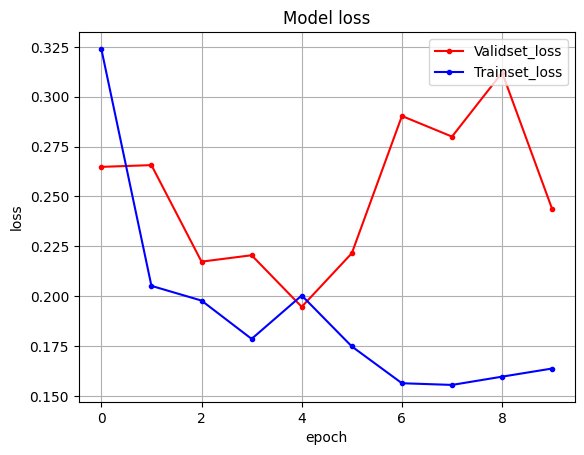

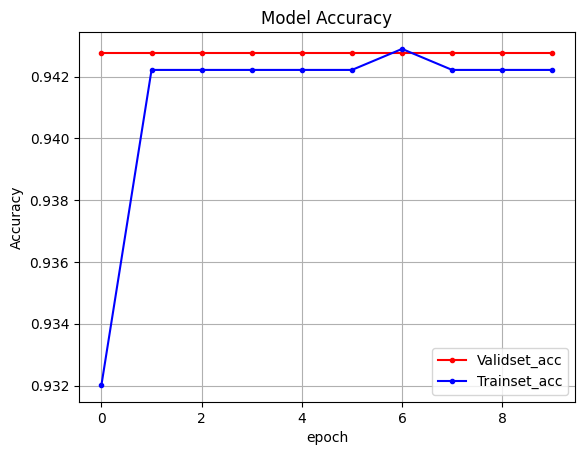

In [ ]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 검증셋과 학습셋의 오차를 저장
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']

# 그래프로 표현
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, marker='.', c="red", label='Validset_acc')
plt.plot(x_len, y_acc, marker='.', c="blue", label='Trainset_acc')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='lower right')
plt.grid()
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()